# Performing GMM
Now that we have our dataset, we can now perform GMM to cluster stocks based on the technical indicators.

In [1]:
tickers = ["AMZN", "TSLA", "BABA", "HD", "TM", "NKE", "MCD", "LOW", "SBUX", "JD", "PDD", "BKNG", "GM", "MELI", "TJX", "NIO", "F", "LULU", "HMC", "CMG"]

In [2]:
import sys
import os

!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas

In [3]:
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from IPython.display import display, HTML

%matplotlib inline


We will first perform GMM on each stock individually based on its technical indicators, with the covariance type as full

Clustering stocks using GMM


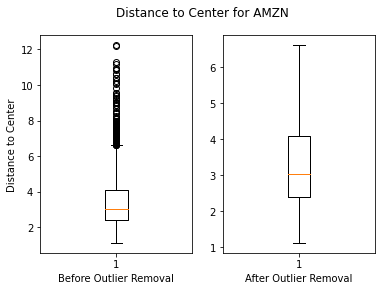

AMZN has 312 outliers out of 2417 points (12.91%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,61.302666,57.226946,0.024464,1.344025e+06,2.256526,0.992400,0.972495,0.909590,0.414714,-25.798074,0.016028,0.018976,0.057146,0.208839,0.336817
1,44.995223,46.709560,0.025821,-6.622411e+05,2.533391,1.004447,1.019153,0.997374,0.462262,-64.339046,-0.008837,-0.010016,-0.027713,0.063272,0.181473
2,57.001725,54.465590,0.020092,7.320122e+05,1.946050,0.997717,0.986371,0.947267,0.100120,-36.574102,0.009518,0.007179,0.030887,0.127757,0.481710


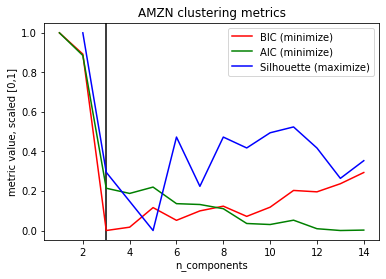

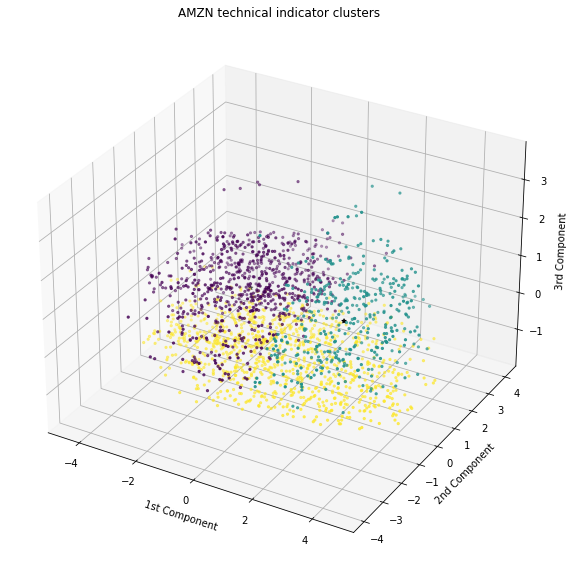

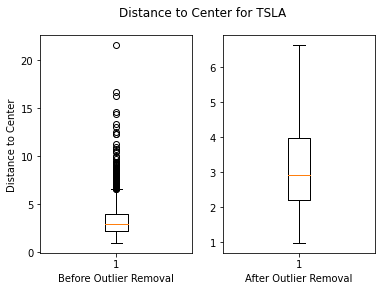

TSLA has 333 outliers out of 2417 points (13.78%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,54.668037,48.892909,0.043682,-5.363296e+06,4.071596,0.991773,0.977648,0.971779,0.668004,-44.431012,0.010992,0.019487,0.050551,0.044920,0.119482
1,41.633701,44.359217,0.042308,-7.093633e+06,4.147661,1.017246,1.052204,1.046845,0.096347,-72.628461,-0.018872,-0.037847,-0.069671,0.059386,0.235605
2,57.809709,55.029628,0.040715,9.606315e+06,3.837429,0.990794,0.967623,0.915663,0.077437,-33.000607,0.016419,0.025722,0.072894,0.305114,0.644914


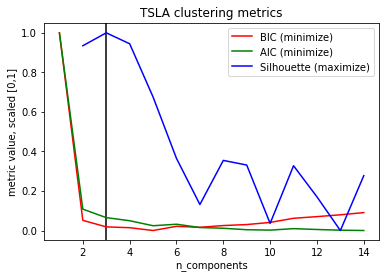

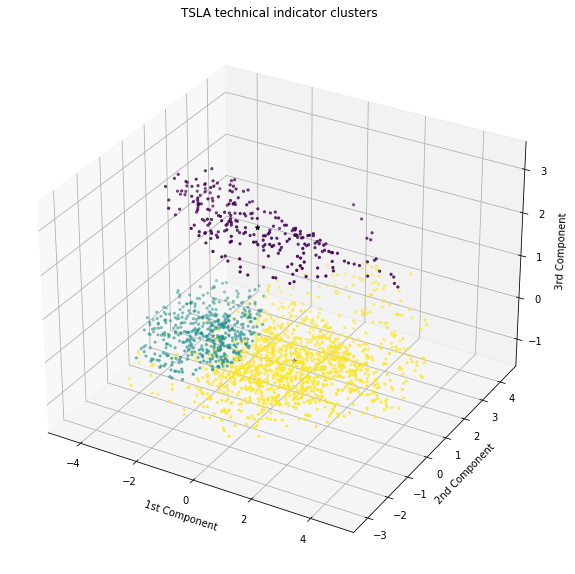

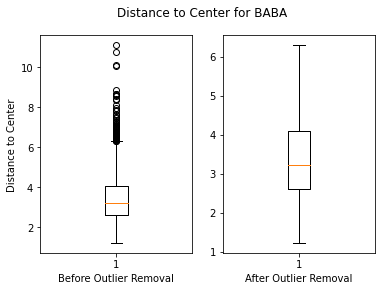

BABA has 244 outliers out of 1702 points (14.34%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,40.822030,44.013623,0.035422,-4.974381e+06,3.191290,1.009106,1.034019,1.067253,0.467062,-69.976181,-0.020332,-0.019338,-0.058909,-0.037681,0.220850
1,63.434234,58.183382,0.027027,7.865361e+06,2.462285,0.993620,0.963066,0.877123,0.398837,-22.967149,0.027615,0.017762,0.084382,0.247188,0.248971
2,52.248139,49.981813,0.029058,7.924271e+05,2.656848,1.007303,1.003127,0.941604,0.387578,-52.008061,0.010490,-0.012966,0.018985,0.170064,0.118656
3,43.307173,42.306999,0.021196,-7.705853e+06,2.493387,1.012023,1.026955,1.055965,1.274653,-69.389345,-0.006088,-0.025264,-0.030524,-0.072375,0.099451
4,59.648172,54.708543,0.019267,2.964431e+06,2.274024,0.990368,0.967177,0.968712,1.270822,-25.358552,0.016952,0.023069,0.063167,0.027060,0.189300


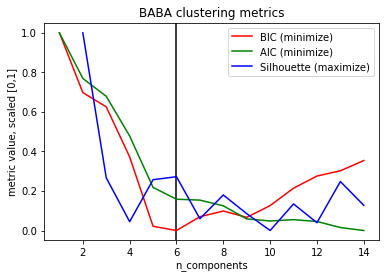

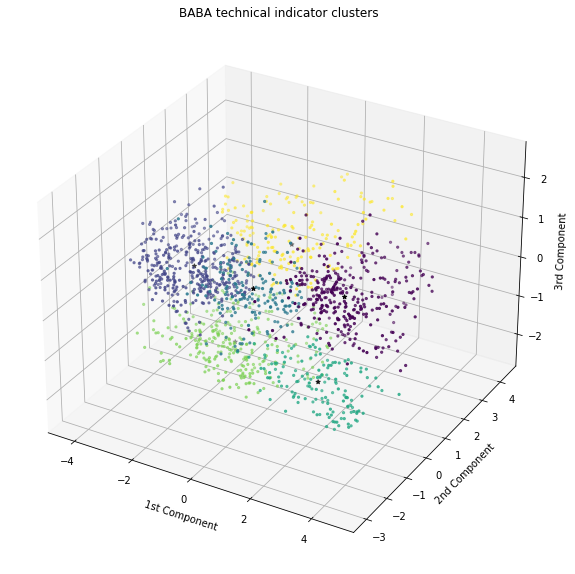

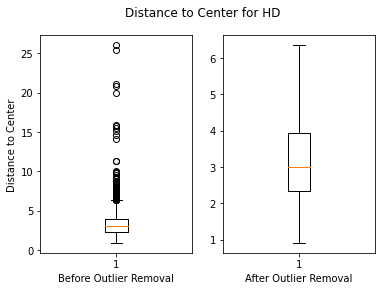

HD has 303 outliers out of 2417 points (12.54%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,56.642143,-0.330372,0.015529,-5.279545e+08,18.868892,0.998567,0.990925,0.950358,0.513159,-323.964695,0.007782,0.004392,0.023000,0.115139,0.395459
1,63.695598,5.974872,0.018238,-1.865377e+08,9.005693,0.991562,0.973372,0.934210,0.232504,-134.683065,0.013199,0.019949,0.049095,0.123178,0.333491
2,47.215816,1.536402,0.017640,-1.845289e+08,9.480838,1.004133,1.010562,0.986972,0.240972,-200.037908,-0.002907,-0.008664,-0.013055,0.063241,0.271050


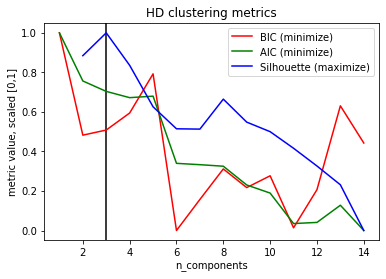

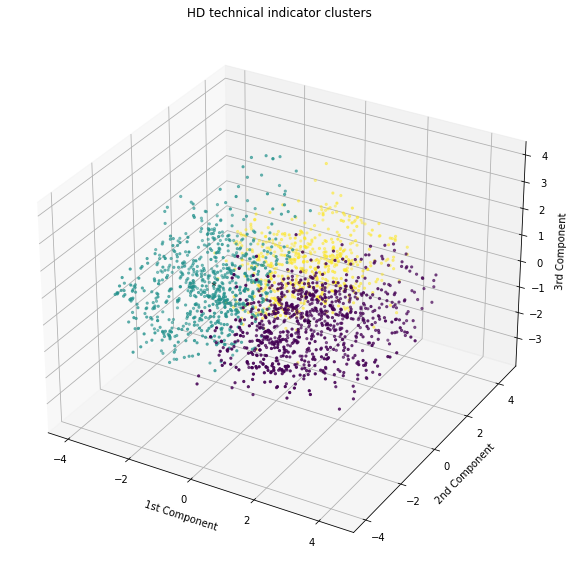

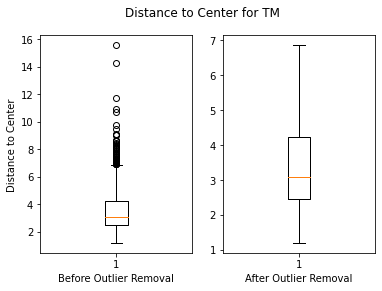

TM has 302 outliers out of 2417 points (12.49%)


,RSI,Ultimate,BandRadius,Chaikin,NATR,SMA_5,SMA_20,SMA_100,SAR,Williams%R,APO,ROC_5,ROC_20,ROC_100,ClusterCoverage%
0,64.138338,56.579821,0.017118,4.162418e+05,1.032012,0.986583,0.969965,0.957089,0.457057,-0.655458,0.006917,0.029642,0.040560,0.060820,0.078014
1,44.404756,-15.127931,0.019119,-2.745711e+07,10.327238,1.002016,1.010823,1.018857,0.631850,-228.445008,-0.006262,-0.005204,-0.018521,0.000904,0.085106
2,38.829961,38.259055,0.017754,8.072764e+04,1.409702,1.007915,1.025935,1.044504,0.485024,-82.606346,-0.011744,-0.018090,-0.041664,-0.046477,0.086998
3,65.010992,10.535904,0.015024,-2.203590e+07,8.290576,0.994849,0.971012,0.913917,0.553199,-148.971696,0.020286,0.014011,0.061739,0.161150,0.055792
4,45.533199,16.913931,0.018122,-1.242847e+07,5.413986,1.002173,1.010080,1.016839,0.546169,-136.489856,-0.005646,-0.005243,-0.016940,-0.003694,0.122459


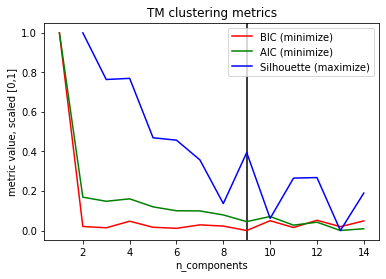

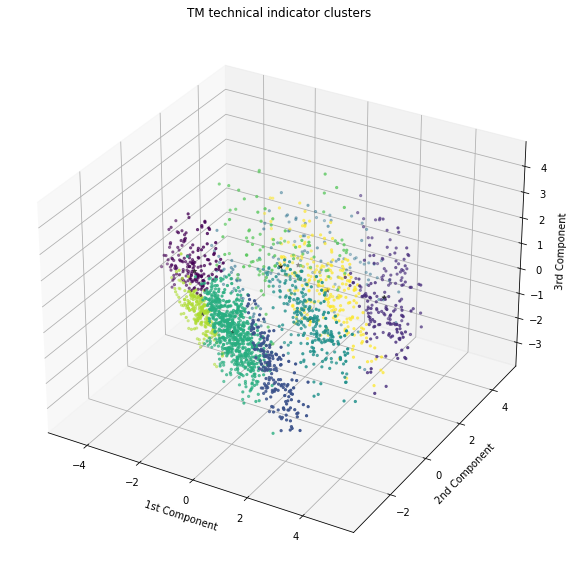

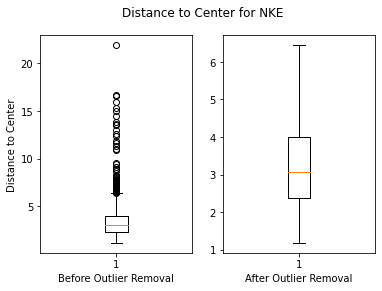

NKE has 301 outliers out of 2417 points (12.45%)


In [ ]:

print("Clustering stocks using GMM")
numClusters = []

if not os.path.exists("plots"):
        os.mkdir("plots")


for i in range(len(tickers)):

    # read in data from csv
    data = pd.read_csv(f'./data/{tickers[i]}.csv')

    # generate matrix with technical indicators (features) as columns
    features = data.to_numpy()[:, 6:]

    # normalize each feature
    scaler = StandardScaler()
    X = scaler.fit_transform(features)


    # Remove outliers
    center = np.mean(X, axis=0)
    
    distToCenter = np.linalg.norm(X-center, axis=1)

    #box plot of distance to center
#     plt = reload(plt)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Distance to Center for {tickers[i]}')
    ax1.boxplot(distToCenter)
    plt.setp(ax1, xlabel='Before Outlier Removal')
    plt.setp(ax2, xlabel='After Outlier Removal')
    ax2.boxplot(distToCenter, showfliers=False)
    fig.text(0.06, 0.5, 'Distance to Center', ha='center', va='center', rotation='vertical')
    plt.savefig(f"plots/outliers_{tickers[i]}.png")
    plt.show()



    # Calculate IQR
    q75, q25 = np.percentile(distToCenter, [75 ,25])
    
    iqr = q75 - q25

    # Calculate outlier cutoff and remove outliers
    nonOutlierIndices = np.argwhere((distToCenter < q75 + 0.5 * iqr) & (distToCenter > q25 - 1 * iqr)).reshape(-1)
    outlierPercentage = 100 * (len(X) - len(nonOutlierIndices)) / float(len(X))
    print(f'{tickers[i]} has {len(X) - len(nonOutlierIndices)} outliers out of {len(X)} points ({round(outlierPercentage, 2)}%)')
    X = X[nonOutlierIndices]


    # PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    X = pca.fit_transform(X)
    
    # GMM
    n_components = np.arange(1, features.shape[1]+1)
    gmms = [GaussianMixture(n_components=k, covariance_type='full').fit(X) for k in n_components]

    
    # Calculate metrics
    silhouettes = np.array([metrics.silhouette_score(X, gmms[k-1].predict(X)) for k in n_components[1:]])
    bics = np.array([gmm.bic(X) for gmm in gmms])
    aics = np.array([gmm.aic(X) for gmm in gmms])
    
    minidx = min(np.argmin(bics), np.argmin(aics))
    argmaxSil = np.argmax(silhouettes)
    if argmaxSil > 0 and silhouettes[argmaxSil - 1] < silhouettes[argmaxSil]:
        # enforce local maximum (peak) for silhouette
        minidx = min(minidx, argmaxSil + 1)
        
    numClusters.append(minidx + 1)
    
    centroids = gmms[minidx].means_

    # descale centroids
    centroids_descaled = scaler.inverse_transform(pca.inverse_transform(centroids))

    # create df for centroids
    centroids_df = pd.DataFrame(centroids_descaled, columns=data.columns[6:])
    centroids_df['ClusterCoverage%'] = [pair[1] / X.shape[0] for pair in np.asarray(np.unique(gmms[minidx].predict(X), return_counts=True)).T]
    display(centroids_df.head())
    if not os.path.exists("centroids"):
        os.mkdir("centroids")
    centroids_df.to_csv(f'./centroids/{tickers[i]}_centroids.csv')


    # plot the results
#     plt = reload(plt)
    fig = plt.figure()
    plt.title(f"{tickers[i]} clustering metrics")
    plt.axvline(x=minidx + 1, color='black')
    plt.plot(n_components, minmax_scale(bics), label='BIC (minimize)', color='r')
    plt.plot(n_components, minmax_scale(aics), label='AIC (minimize)', color='g')
    plt.plot(n_components[1:], minmax_scale(silhouettes), label='Silhouette (maximize)', color='b')
    plt.legend(loc='best')
    plt.xlabel('n_components')
    plt.ylabel('metric value, scaled [0,1]')
    plt.savefig(f"plots/clustering_{tickers[i]}.png")
    plt.show()

#     plt = reload(plt)
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], s=5, c=gmms[minidx].predict(X), cmap='viridis')
    ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='black')
    ax.set_xlabel("1st Component")
    ax.set_ylabel("2nd Component")
    ax.set_zlabel("3rd Component")
    plt.title(f"{tickers[i]} technical indicator clusters")
    plt.savefig(f"plots/pca{tickers[i]}.png")
#     plt.show()

    # plt.plot(n_components[1:], silhouette_avg, label='SC')
    # plt.legend(loc='best')
    # plt.xlabel('n_components')
    # plt.ylabel('Sillhouette Score')
    # plt.show()
plt.show()

number of clusters (raw) [3, 3]
mean: 3.0 , rounds to 3 clusters


ValueError: `bins` must be positive, when an integer

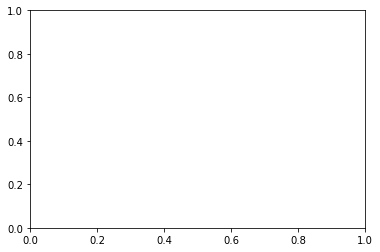

In [5]:
%matplotlib inline

print('number of clusters (raw)', numClusters)
print('mean:', np.mean(numClusters), ', rounds to', int(np.mean(numClusters)), 'clusters')

fig = plt.figure()
plt.hist(numClusters, align='left', bins=np.max(numClusters) - np.min(numClusters))
plt.axvline(x=np.mean(numClusters), c='red')
plt.xlabel="num clusters"
plt.ylabel='freq'
plt.title('frequence of number of clusters')
plt.show()